1. Set up data for tqqq (5 min interval)
2. Set up data for tqqq MACD
3. Set up data for tqqq RSI
4. Set up data for tqqq Bollinger Band
5. Research on paper trading app

What is needed:
1. Controls:
   1. Monthly/Weekly/Daily Expected Returns Parameter
   2. Short term MACD vs. Long term EMA ratio
   3. Historical MACD and Long term EMA ratio (what was the probability?)
      1. Set up threshold for the ratio for going into the market
      2. Set up threshold for the ratio for getting out of the market
   4. Set up Bollinger Band and RSI threshold
2. Process:
   1. **prereq**: See if EMA of 1 year trajectory meets the actual trajectory
   2. Match MACD, RSI, Bollinger Band
   3. Calculate MACD to LEMA ratio
   4. 

In [878]:
'start_date' in globals()

True

In [39]:
import requests

start_date = '2024-01-24'
url = f'https://api.polygon.io/v2/aggs/ticker/TQQQ/range/1/day/2017-01-01/{start_date}?adjusted=true&sort=asc&limit=50000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

In [36]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress
start_date = '2024-01-24'
url = f'https://api.polygon.io/v1/indicators/macd/TQQQ?timestamp.lte={start_date}&timespan=day&adjusted=true&short_window=12&long_window=26&signal_window=9&series_type=close&order=asc&limit=5000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

value = []
signal = []
histogram = []
time = []

while 'next_url' in data.keys():
    for d in data['results']['values']:
        value.append(d['value'])
        signal.append(d['signal'])
        histogram.append(d['histogram'])
        time.append(datetime.fromtimestamp(int(str(d['timestamp'])[:-3])))

    url = data['next_url']+"&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl"
    r = requests.get(url)
    data = r.json()

    print(f"Latest Time: {time[-1]}")

df_macd = pd.DataFrame({'time': time, 'value': value, 'signal': signal, 'histogram': histogram})

In [37]:
start_date = '2024-01-24'
url = f'https://api.polygon.io/v2/aggs/ticker/TQQQ/range/1/day/2017-01-01/{start_date}?adjusted=true&sort=asc&limit=50000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

close = []
high = []
low = []
time = []

while 'next_url' in data.keys():
    for d in data['results']:
        close.append(d['c'])
        high.append(d['h'])
        low.append(d['l'])
        time.append(datetime.fromtimestamp(int(str(d['t'])[:-3])))

    url = data['next_url']+"&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl"
    r = requests.get(url)
    data = r.json()

    print(f"Latest Time: {time[-1]}")

df_stock = pd.DataFrame({'time': time, 'high': high, 'low': low, 'close': close})

In [20]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime

start_date = '2024-01-24'
url = f'https://api.polygon.io/v1/indicators/rsi/TQQQ?timestamp.lte={start_date}&timespan=day&adjusted=true&window=14&series_type=close&order=asc&limit=5000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

value = []
time = []

while 'next_url' in data.keys():
    for d in data['results']['values']:
        value.append(d['value'])
        time.append(datetime.fromtimestamp(int(str(d['timestamp'])[:-3])))

    url = data['next_url']+"&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl"
    r = requests.get(url)
    data = r.json()

    print(f"Latest Time: {time[-1]}")

df_rsi = pd.DataFrame({'time': time, 'value': value})

# New start

In [5]:
import requests
from datetime import datetime
import pandas as pd

start_date = '2024-01-24'
url = f'https://api.polygon.io/v1/indicators/rsi/TQQQ?timestamp.lte={start_date}&timespan=day&adjusted=true&window=14&series_type=close&order=asc&limit=5000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

value = []
time = []

for d in data['results']['values']:
    value.append(d['value'])
    time.append(datetime.fromtimestamp(int(str(d['timestamp'])[:-3])))

df_rsi = pd.DataFrame({'time': time, 'value': value})

In [6]:
start_date = '2024-01-24'
url = f'https://api.polygon.io/v1/indicators/macd/TQQQ?timestamp.lte={start_date}&timespan=day&adjusted=true&short_window=7&long_window=14&signal_window=9&series_type=close&order=asc&limit=5000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

value = []
signal = []
histogram = []
time = []

for d in data['results']['values']:
    value.append(d['value'])
    signal.append(d['signal'])
    histogram.append(d['histogram'])
    time.append(datetime.fromtimestamp(int(str(d['timestamp'])[:-3])))

df_macd = pd.DataFrame({'time': time, 'value': value, 'signal': signal, 'histogram': histogram})

In [7]:
start_date = '2024-01-24'
url = f'https://api.polygon.io/v2/aggs/ticker/TQQQ/range/1/day/2017-01-01/{start_date}?adjusted=true&sort=asc&limit=50000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

close = []
high = []
low = []
time = []

for d in data['results']:
    close.append(d['c'])
    high.append(d['h'])
    low.append(d['l'])
    time.append(datetime.fromtimestamp(int(str(d['t'])[:-3])))

df_stock = pd.DataFrame({'time': time, 'high': high, 'low': low, 'close': close})

In [8]:
start_date = '2024-01-24'
url = f'https://api.polygon.io/v1/indicators/ema/TQQQ?timestamp.lte={start_date}&timespan=day&adjusted=true&window=50&series_type=close&order=asc&limit=5000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
r = requests.get(url)
data = r.json()

value = []
time = []

for d in data['results']['values']:
    value.append(d['value'])
    time.append(datetime.fromtimestamp(int(str(d['timestamp'])[:-3])))

df_ema = pd.DataFrame({'time': time, 'value': value})

In [9]:
data_merge = pd.merge(df_stock,df_ema, 'right')
data_merge['ema_yr'] = data_merge['value']
data_merge = data_merge.drop(['value'], axis = 1)

data_merge = pd.merge(data_merge,df_rsi, 'left', on = 'time')
data_merge['rsi'] = data_merge['value']
data_merge = data_merge.drop(['value'], axis = 1)

df_final = pd.merge(data_merge,df_macd, 'left')
df_final['macd'] = df_final['value']
df_final = df_final.drop(['value'], axis = 1)

df_final['ema_macd'] = df_final['macd']/df_final['ema_yr']

In [12]:
from scipy.stats import linregress

x1 = df_final.ema_yr.tolist()
x2 = df_final.macd.tolist()

length = df_final.shape[0] - 10

ema_slope = [0]*10
macd_slope = [0]*10

for i in range(length):
    ema_slope.append(linregress([j for j in range(10)],x1[i:i+10]).slope)
    macd_slope.append(linregress([k for k in range(10)],x2[i:i+10]).slope)

df_final['ema_slope'] = ema_slope
df_final['macd_slope'] = macd_slope

df_final['ema_macd_slope_ratio'] = df_final['macd_slope']/df_final['ema_slope']

In [13]:
buy_index = []
sell_index = []
options = []

most_recent = 0
for i,row in enumerate(df_final.iterrows()):
    #if the overall trend is positive
    if row[1]['ema_slope'] > 0:
        #and short term is also positive
        if row[1]['macd_slope'] > 0:
            #the macd/ema slope is going to be positive
            #the short and long term is both trending upwards
            #consider buying and sell when the ema/macd slope is higher than the current
            buy_indexx, result_index = next(((i, index+i) for index, value in enumerate(df_final.ema_macd[i:i+15]) if (value >row[1]['ema_macd']) and (index+i > most_recent)), (None, None))
            buy_index.append(buy_indexx)
            sell_index.append(result_index)

            if result_index != None:
                most_recent = result_index
                options.append('option 1')
            else:
                options.append(None)

        #if the short term trend is negative
        else:
            #the macd/ema slope is going to be negative
            #in the long run, it's going up, but in short run, it's going down
            #look at RSI to see if the stock is undervalued (less than 35) and if it is buy
            if row[1]['rsi'] <= 70:
                buy_indexx, result_index = next(((i, index+i) for index, value in enumerate(df_final.ema_macd[i:i+15]) if (value >row[1]['ema_macd']) and (index+i > most_recent)), (None, None))
                buy_index.append(buy_indexx)
                sell_index.append(result_index)          
                
                if result_index != None:
                    most_recent = result_index
                    options.append('option 2')
                else:
                    options.append(None)
            
            else: 
                buy_index.append(None)
                sell_index.append(None)

    else: #if the overall trend is negative
        #but the short term trend is positive
        if row[1]['macd_slope'] > 0:
            #the macd/ema slope is going to be negative
            #in the long term perspective it's downward, but short term is positive
            #look at RSI to see if the stock is overvalued (over 70) and if it is, don't buy
            if row[1]['rsi'] <= 30:
                buy_indexx, result_index = next(((i, index+i) for index, value in enumerate(df_final.ema_macd[i:i+15]) if (value >row[1]['ema_macd']) and (index+i > most_recent)), (None, None))
                buy_index.append(buy_indexx)
                sell_index.append(result_index)          
                
                if result_index != None:
                    most_recent = result_index
                    options.append('option 3')
                else:
                    options.append(None)
            
            else: 
                buy_index.append(None)
                sell_index.append(None)
        
        #if the short term trend is also negative
        else:
            #the macd/ema slope is going to be positive
            #the short and long term is both trending downwards
            #consider buying and selling when the ema/macd slope is higher than the current (put option)
            #but for the sake of just stocks, don't buy
            buy_index.append(None)
            sell_index.append(None)        
            options.append(None)    

             



In [14]:
amount = []
inputd = []
t_f = []
dates_bought = []
dates_sold = []

b = [i for i in buy_index if i is not None]
s = [i for i in sell_index if i is not None]
o = [i for i in options if i is not None]

for i in range(len(b)):
    amount.append(df_final.close[s[i]] - df_final.close[b[i]])
    inputd.append(df_final.close[b[i]])
    dates_bought.append(df_final.time[b[i]])
    dates_sold.append(df_final.time[s[i]])
    if df_final.close[s[i]] - df_final.close[b[i]] >0:
        t_f.append(1)
    else:
        t_f.append(0)


In [862]:
pd.DataFrame({'dates_bought': dates_bought, 'dates_sold': dates_sold,'option':o, 'amount':amount, 't_f': t_f}).to_csv("./test.csv")

In [15]:
pd.DataFrame({'option':o, 'amount':amount, 't_f': t_f}).groupby(['option','t_f'])['amount'].sum()

option    t_f
option 1  0       -2.0600
          1      524.0100
option 2  0      -34.7675
          1      633.2975
Name: amount, dtype: float64

In [898]:
np.sum(amount)/np.sum(inputd)


0.07452441616094635

In [843]:
10000*0.07897244859696387

789.7244859696386

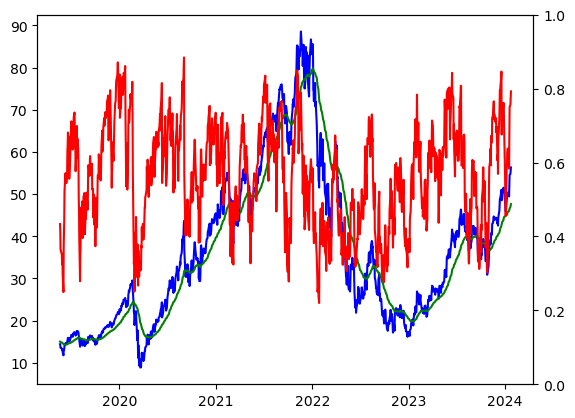

In [645]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df_final.time, df_final.close, color = 'b')
ax1.plot(df_final.time, df_final.ema_yr, color = 'g')
ax1.plot(df_final.time, df_final.rsi, color = 'r')

# ax2.plot(df_final.time, df_final.macd, color = 'y')

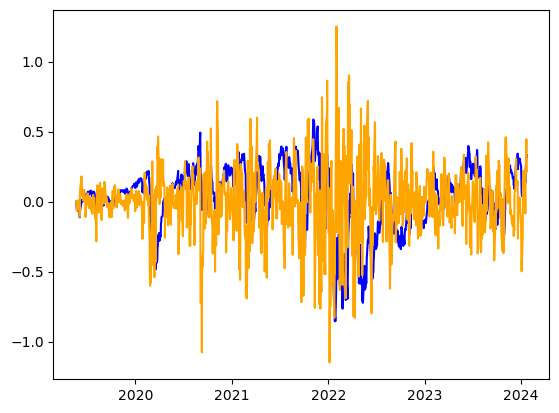

In [646]:
plt.plot(df_final.time,df_final.ema_slope, color = 'blue')
plt.plot(df_final.time,df_final.macd_slope, color = 'orange')

In [867]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x = df_final.time, y = df_final.close, name = 'close price'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = df_final.time , y = df_final.ema_macd, name = 'ema macd ratio'),
    secondary_y=True,
)

for date in [i for i in dates_bought]:
    fig.add_vline(x=date, line_width=1, line_dash="dash", line_color="green")

for d in [i for i in dates_sold]:
    fig.add_vline(x=d, line_width=1, line_dash="dash", line_color="blue")

fig.show()

/Users/veochae/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [829]:
df_final

,time,high,low,close,ema_yr,rsi,signal,histogram,macd,ema_slope,macd_slope,ema_macd_slope_ratio,ema_macd
0,2019-05-22,14.4450,14.1400,14.205,15.015620,41.334554,-0.304513,-0.065269,-0.369782,0.000000,0.000000,NaN,-0.024626
1,2019-05-23,13.7200,13.2763,13.535,14.957556,36.642446,-0.330283,-0.103078,-0.433361,0.000000,0.000000,NaN,-0.028973
2,2019-05-24,13.9000,13.4700,13.515,14.900985,36.509218,-0.356741,-0.105834,-0.462576,-0.058064,-0.063579,1.094996,-0.031043
3,2019-05-28,13.8525,13.3575,13.370,14.840947,35.501402,-0.382005,-0.101057,-0.483062,-0.056571,-0.029215,0.516424,-0.032549
4,2019-05-29,13.2500,12.8150,13.035,14.770125,33.219815,-0.409476,-0.109884,-0.519360,-0.060039,-0.020487,0.341229,-0.035163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2024-01-18,51.7200,50.1100,51.560,46.286426,63.339217,0.390419,0.169426,0.559845,0.137503,-0.084267,-0.612839,0.012095
1173,2024-01-19,54.6200,52.1000,54.540,46.610095,70.694004,0.513492,0.492290,1.005782,0.215248,0.179895,0.835756,0.021579
1174,2024-01-22,55.9200,54.5101,54.760,46.929700,71.154095,0.668349,0.619432,1.287781,0.323670,0.445937,1.377753,0.027441
1175,2024-01-23,55.4800,54.2800,55.410,47.262260,72.526483,0.835477,0.668511,1.503988,0.319604,0.281999,0.882340,0.031822


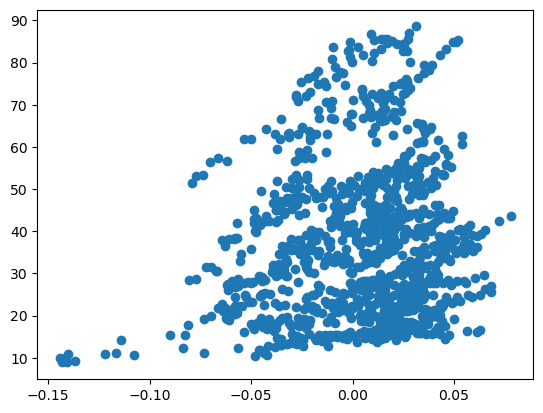

In [900]:

plt.scatter(df_final.ema_macd,df_final.close)

In [902]:
linregress(df_final.ema_macd,df_final.close)

LinregressResult(slope=73.54134363143082, intercept=36.427920986185036, rvalue=0.13359617722524894, pvalue=4.243151188028866e-06, stderr=15.91504833962529, intercept_stderr=0.532866468705499)

In [17]:
from collections import Counter

In [19]:
cnt = Counter()

for word in ['a', 'b']:
    cnt[word] += 1

In [24]:
pd.DataFrame.from_dict(cnt)

ValueError: If using all scalar values, you must pass an index